# Email Spam Detection using Python

The provided dataset consists of email data with three columns:

1. v1: Indicates whether the email is classified as spam  or ham (non-spam). It has two possible values:
   - "ham": Indicates a non-spam email.
   - "spam": Indicates a spam email.

2. v2: Contains the text content of the email.
   - This column includes the body of the email, which may contain various information such as the subject, message content, and other relevant details.


# Reading and Understanding of Data

Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

Loading the Dataset

In [2]:
# Loading the Dataset with 'ISO-8859-1' encoding
df= pd.read_csv(r"C:\Users\avani\Downloads\archive (18)\spam.csv", encoding='ISO-8859-1')
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
# Showing First 5 Rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Showing Last 5 Rows
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
# Showing no. of rows and columns in the data
df.shape
# no of rows = 5171
# no. of columns = 4

(5572, 5)

In [6]:
# Showing columns of the dataset
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

# Data pre Processing 


In [7]:
# Checking null values
df.isna().sum() # no null values

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
# Checking Duplicated Values
df.duplicated().sum()

403

In [9]:
# Dropping Duplicated Values
df.drop_duplicates()
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [11]:
# Dropping column
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1 , inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
# Add numerical column 'label_num' based on 'label' column
df['label_num'] = df['v1'].map({'ham': 0, 'spam': 1})

label_num: Represents the numerical label corresponding to the `label` column.
   - It has two values:
     - 0: Represents a non-spam email (ham).
     - 1: Represents a spam email.

The `label_num` column provides a numerical representation of the labels for model training purposes.

In [13]:
# Renaming Column Names
df.columns = ['Category','subject','Numeric Category']

# checking for column names
df.columns

Index(['Category', 'subject', 'Numeric Category'], dtype='object')

In [14]:
# Statistical summary of the data
df.describe()


,Numeric Category
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [15]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Category          5572 non-null   object
 1   subject           5572 non-null   object
 2   Numeric Category  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [16]:
df.head()

,Category,subject,Numeric Category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


array([[<AxesSubplot:title={'center':'Numeric Category'}>]], dtype=object)

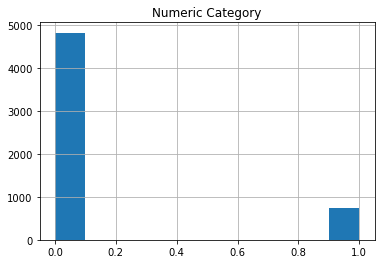

In [17]:
df.hist()

In [18]:
df['Numeric Category'].value_counts() # counts the value of ham or spam label

0    4825
1     747
Name: Numeric Category, dtype: int64

In [19]:
# Showing Unique Values of Category column
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

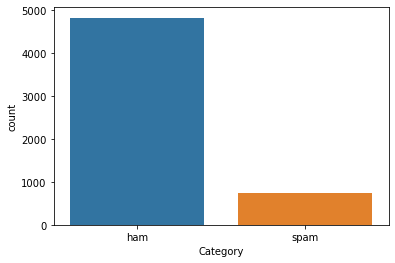

In [20]:
# Plotting Countplot for Category Column
sns.countplot(data = df , x = 'Category')
plt.show()

This Plot Clearly Shows that most of the mails are ham which means they are not spam mails.

# 2. Subject Column

Before Cleaning

In [21]:
# Showing first row of Subject column 
df['subject'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [22]:
import re

# Convert text to lowercase
df['subject'] = df['subject'].str.lower()

# Remove special characters
df['subject'] = df['subject'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [23]:
# Showing first row of Subject Column after cleaning
df['subject'][0]

'go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'

In [24]:
# checking the data after cleaning
df.head()

,Category,subject,Numeric Category
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0


# Separating the data as Category and Subject

In [25]:
X = df['Category']

Y = df['subject']

In [26]:
print(X)

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object


In [27]:
print(Y)

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                   will  b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: subject, Length: 5572, dtype: object


In [28]:
# Preprocessing and Feature Extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['subject'])
Category = df['Numeric Category']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Category, test_size=0.30, random_state=100)
# Splitting Data into Training and Testing Sets

In [30]:
model = LogisticRegression()
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Model Training


LogisticRegression(max_iter=1000)

In [31]:
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)
# Model Evaluation

Accuracy: 0.9826555023923444
Precision: 0.9791666666666666
Recall: 0.8826291079812206
F1-score: 0.928395061728395


In [32]:
import joblib

# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Save the model to a file
joblib.dump(model, "spam_model.joblib")

['spam_model.joblib']

In [34]:
# To load the model from the file
loaded_model = joblib.load("spam_model.joblib")

In [ ]:
user_input = input("Enter an email: ")
new_email_vectorized = vectorizer.transform([user_input])
prediction = model.predict(new_email_vectorized)

if prediction[0] == 1:
    print("The email is predicted as spam.")
else:
    print("The email is predicted as not spam (ham).")
# User Input and Prediction

In [ ]:
user_input = input("Enter an email: ")
new_email_vectorized = vectorizer.transform([user_input])
prediction = model.predict(new_email_vectorized)

if prediction[0] == 1:
    print("The email is predicted as spam.")
else:
    print("The email is predicted as not spam (ham).")
# User Input and Prediction